## K-fold cross-validation
this is a technique used in machine learning to assess the performance of a model and mitigate issues like overfitting. It

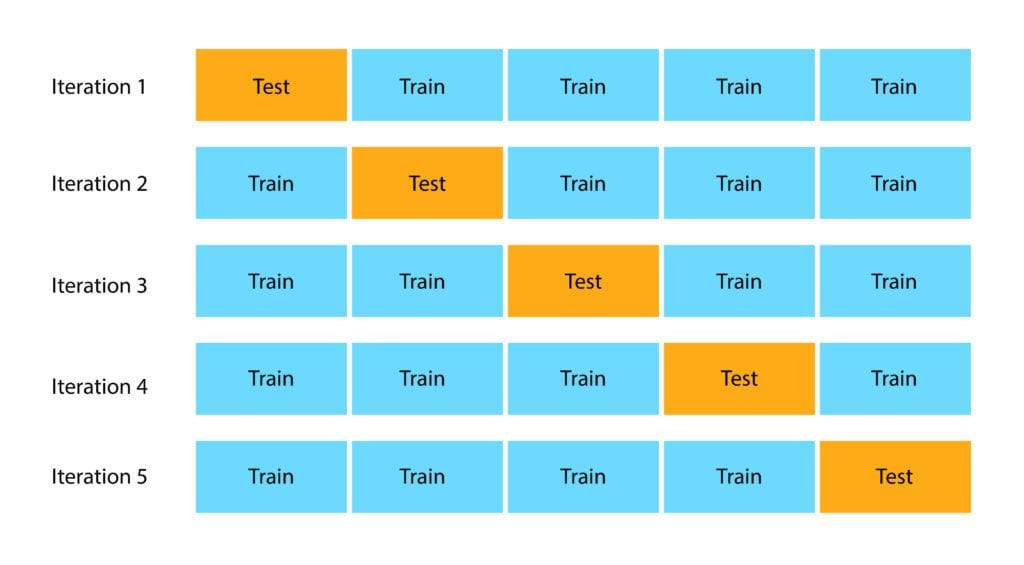

here we compare the performance of logistic regression, random forest, SVM, and K-Nearest Neighbors (KNN) for detecting breast cancer using the Scikit-learn breast cancer dataset,

* Import the necessary libraries.
* Load the breast cancer dataset from Scikit-learn.
* Implement k-fold cross-validation for each algorithm.
* Calculate performance metrics (e.g., accuracy) for each fold and average them.
* Store the results in a data frame.
* Plot the results for comparison.

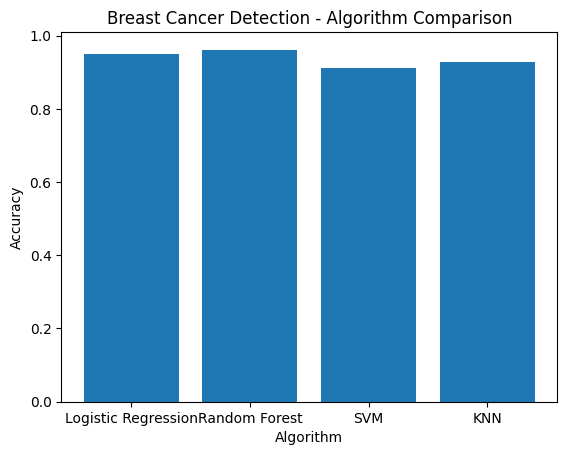

,Algorithm,Accuracy
0,Logistic Regression,0.950800
1,Random Forest,0.961357
2,SVM,0.912172
3,KNN,0.927946


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Define the classifiers with increased max_iter for Logistic Regression and SVM
logistic_regression = LogisticRegression(max_iter=20000)
random_forest = RandomForestClassifier()
svm = SVC(max_iter=2000)
knn = KNeighborsClassifier()

# Step 3 and 4: Implement k-fold cross-validation and calculate performance metrics
k_folds = 5  # You can adjust the number of folds as needed

classifiers = [logistic_regression, random_forest, svm, knn]
results = []

for clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=k_folds, scoring='accuracy')
    avg_score = np.mean(scores)
    results.append(avg_score)

# Step 5: Store the results in a data frame
results_df = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Random Forest', 'SVM', 'KNN'],
    'Accuracy': results
})

# Step 6: Plot the results
plt.bar(results_df['Algorithm'], results_df['Accuracy'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Breast Cancer Detection - Algorithm Comparison')
plt.show()

results_df

 Build and test the model and save it.

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a Random Forest classifier and fit it to the training data
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Step 4: Evaluate the model's performance on the testing set
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also print additional metrics such as classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Save the trained Random Forest model to a file
model_filename = 'breast_cancer_rf_model.joblib'
joblib.dump(random_forest, model_filename)
print("Model saved as", model_filename)


Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[40  3]
 [ 1 70]]
Model saved as breast_cancer_rf_model.joblib


create inferencing record

In [9]:
bcd=X[0]
bcd

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [14]:
import joblib

model_filename = 'breast_cancer_rf_model.joblib'
# Load the saved model
loaded_model = joblib.load(model_filename)

# perform inference testing with real-world data
real_world_data = np.array([bcd])
predictions = loaded_model.predict(real_world_data)
print("Inference Testing Results:")
print(predictions)




Inference Testing Results:
[0]
